## Data preprocessing

### Loading path for dataset

In [15]:
apoorvPath = '/Users/admin/Desktop/Apoorv/dataset'
pranjayPath = '/Users/admin/Documents/255/Project/BaseModelDataset/dataset'
datasetPath = pranjayPath
# finalPath = apoorvPath


In [16]:
!ls $datasetPath

incorrect_mask with_mask      without_mask


In [17]:
!ls $datasetPath/incorrect_mask/* | wc -l
!ls $datasetPath/with_mask/* | wc -l
!ls $datasetPath/without_mask/* | wc -l

     703
     453
     686


### Getting class based on folders

In [18]:
import numpy as np
import pathlib
data_dir = pathlib.Path(datasetPath)
print(data_dir)
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') ])# and item.name != "Sourabh Fire"] )
CLASS_NAMES.sort()
CLASS_NAMES

/Users/admin/Documents/255/Project/BaseModelDataset/dataset


array(['incorrect_mask', 'with_mask', 'without_mask'], dtype='<U14')

### display image from each class

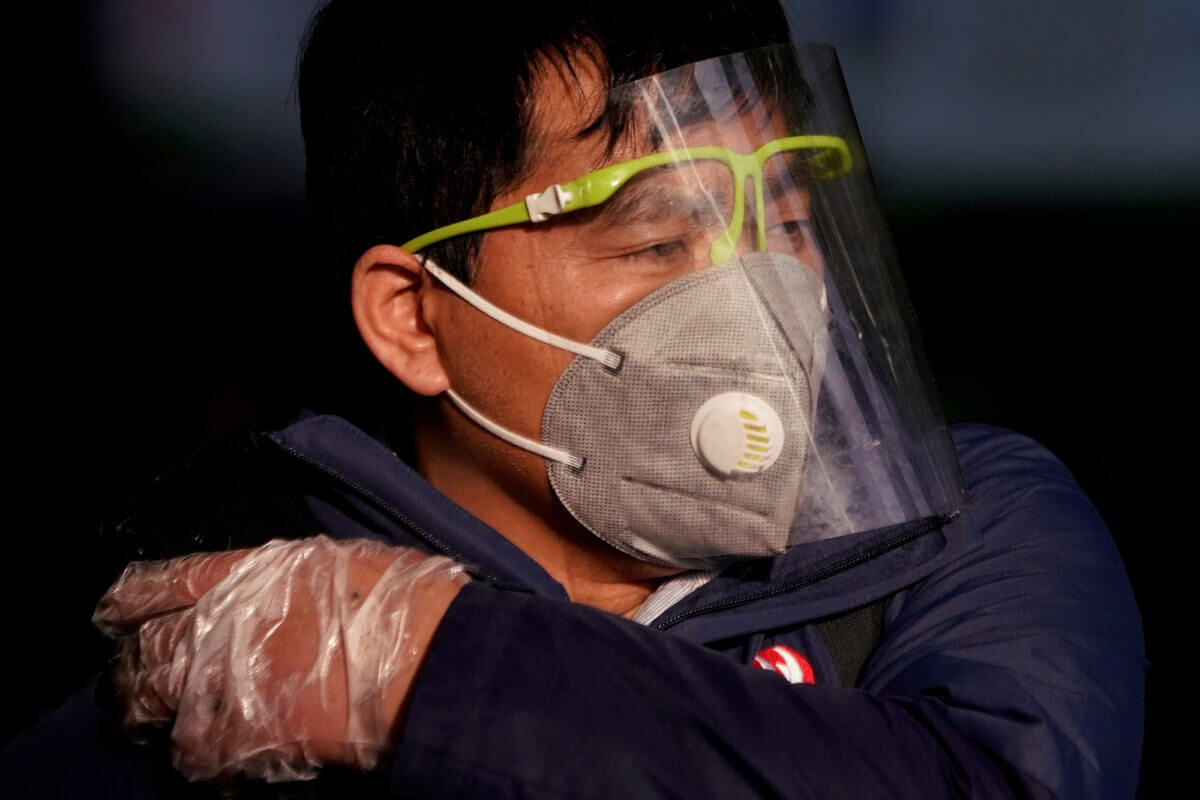

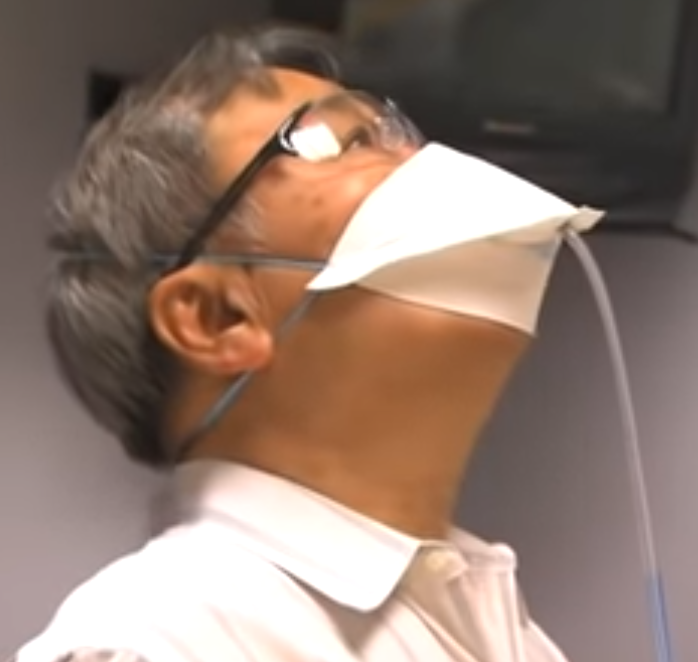

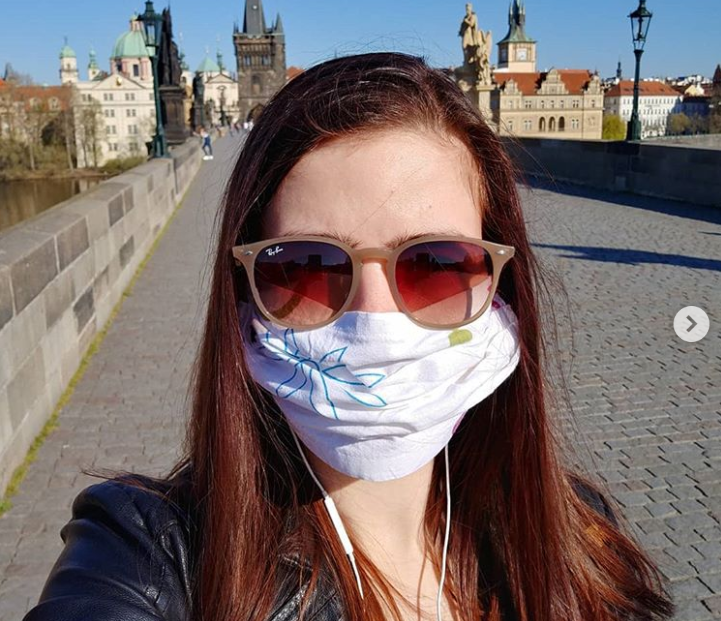

In [19]:
from IPython.display import Image, display

w_mask = list(data_dir.glob('with_mask/*'))

for image_path in w_mask[:3]:
    display(Image(str(image_path)))

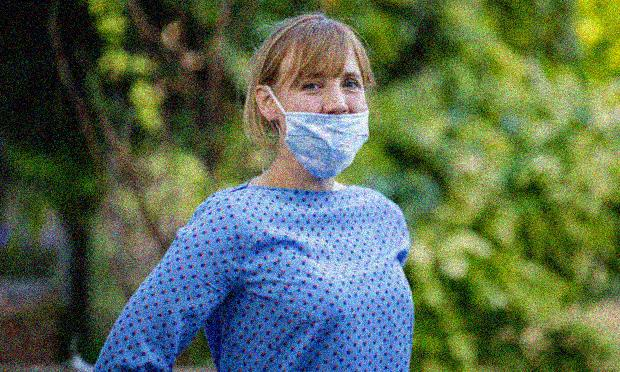

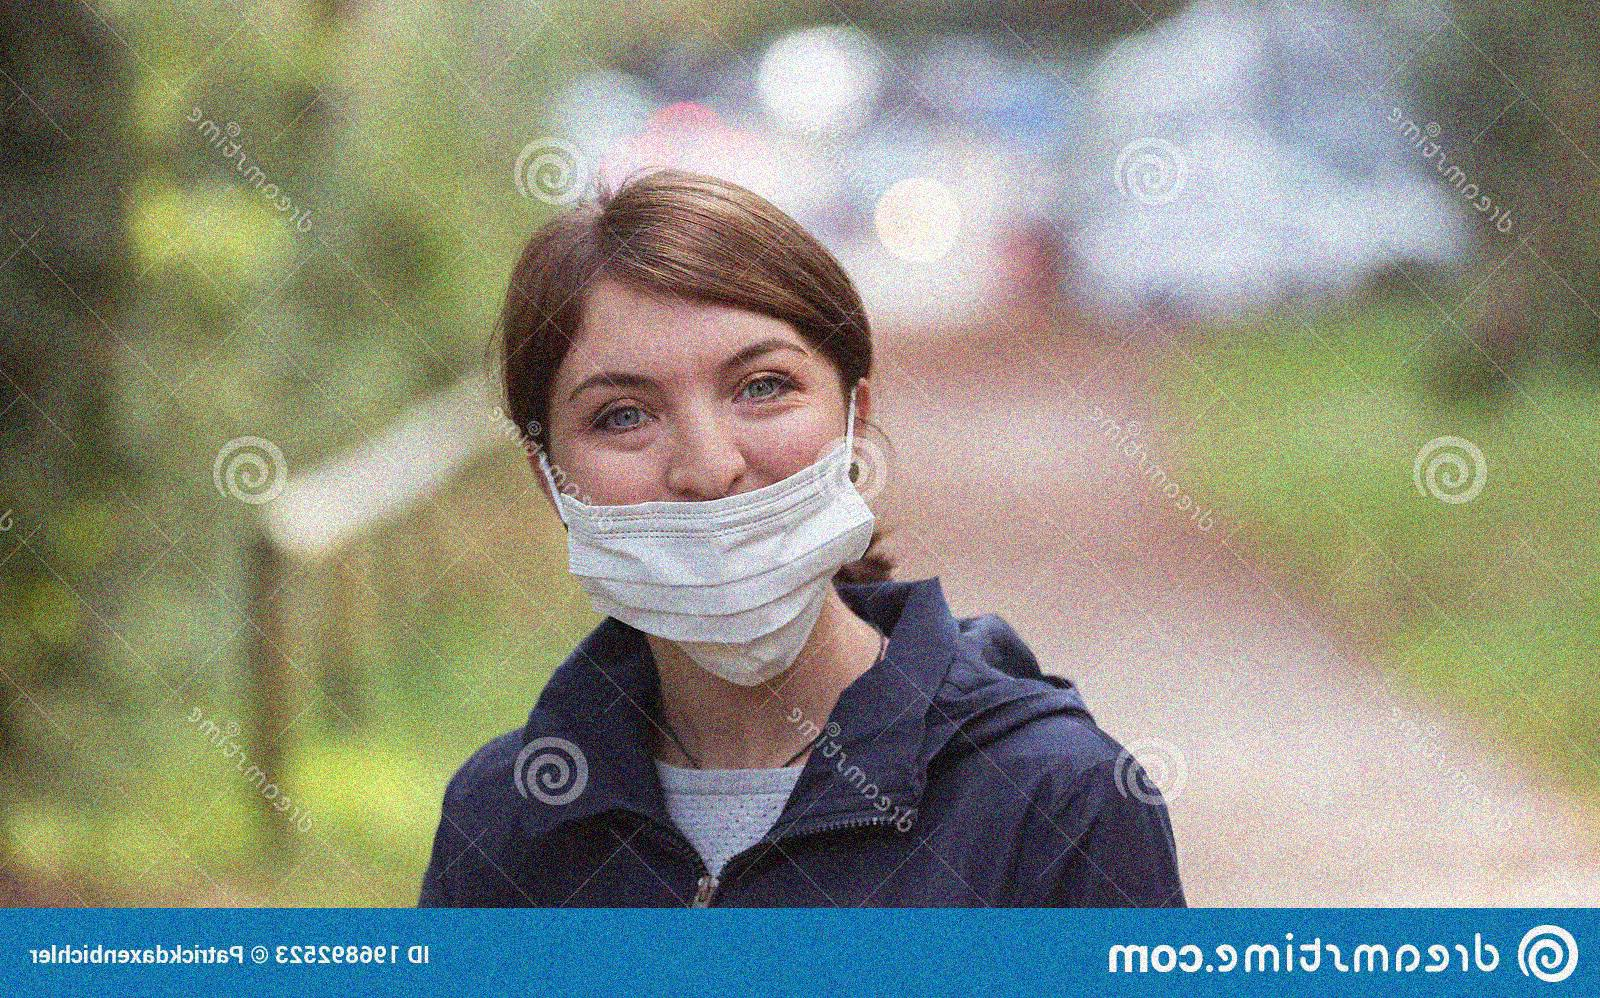

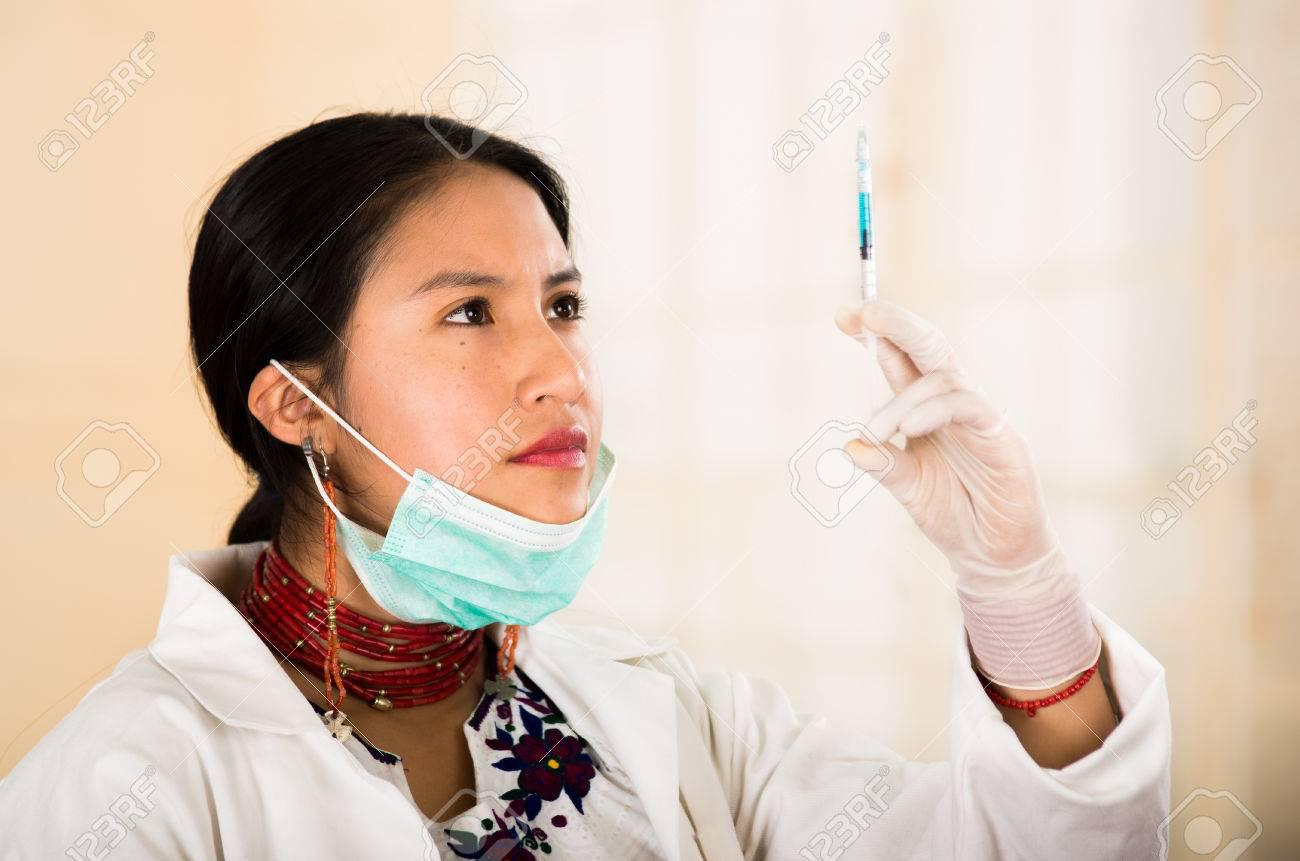

In [20]:
from IPython.display import Image, display

ic_mask = list(data_dir.glob('incorrect_mask/*'))

for image_path in ic_mask[:3]:
    display(Image(str(image_path)))

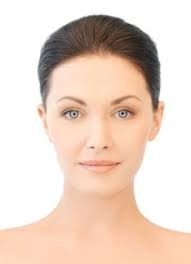

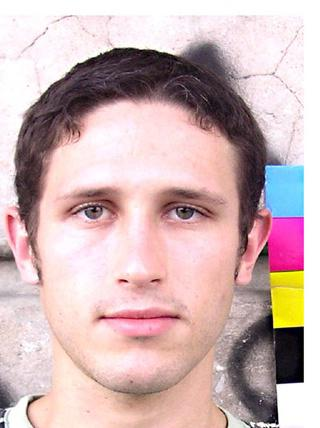

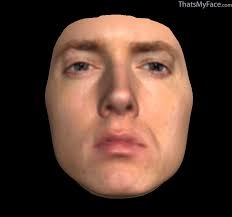

In [21]:
from IPython.display import Image, display

wo_mask = list(data_dir.glob('without_mask/*'))

for image_path in wo_mask[:3]:
    display(Image(str(image_path)))

### loading and splitting data into training and validation data set

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

IMAGE_SIZE = 124
BATCH_SIZE = 64
dataset_dir = datasetPath

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    rescale=1./255, 
    validation_split=0.25)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    shuffle=True,
    subset='training')

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 1383 images belonging to 3 classes.
Found 459 images belonging to 3 classes.


In [9]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

image_batch_train, label_batch_train = next(iter(train_generator))

image_batch_train, label_batch_train = next(iter(train_generator))

Image batch shape:  (64, 124, 124, 3)
Label batch shape:  (64, 3)


### printing classes and there index values

In [10]:
print (train_generator.class_indices)

{'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2}


In [11]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
print(labels)
with open('labels.txt', 'w') as f:
  f.write(labels)

incorrect_mask
with_mask
without_mask


In [12]:
!cat labels.txt

incorrect_mask
with_mask
without_mask

## Function to show images with there respective labels

In [25]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0])
      plt.axis('off')

In [26]:
print(label_batch_train)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


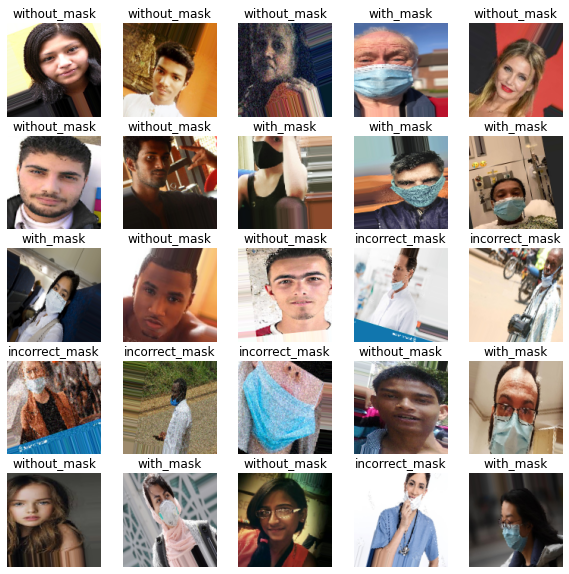

In [15]:
show_batch(image_batch_train, label_batch_train)

## Creating a model

In [27]:
#Model0 Direct Implimentation

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import losses

numclasses=train_generator.num_classes

def build_model0():
  model = models.Sequential()
  changeDim = -1
  #Layer1
  model.add(layers.SeparableConv2D(16, (7, 7), activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
  model.add(layers.BatchNormalization(axis=changeDim))
  model.add(layers.MaxPooling2D(2,2))
    
  #Layer2
  model.add(layers.SeparableConv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization(axis=changeDim))
  model.add(layers.MaxPooling2D(2,2))
  
  #Layer3
  model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization(axis=changeDim))
  
  #Layer4
  model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization(axis=changeDim))
    
  #Layer5 MaxPooling
  model.add(layers.MaxPooling2D(2,2))
  
  #First Fully Connected Layer
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(numclasses, activation='softmax'))

  loss = losses.categorical_crossentropy#losses.sparse_categorical_crossentropy
  #one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1] But if your Yi's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]
  optimizer = optimizers.SGD(lr=0.03, momentum=0.9,decay=0.015 / 50)#optimizers.RMSprop(lr=1e-4)#optimizers.SGD(lr=0.001) #Adam(lr=0.001)
  model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['acc'])

  return model
  

### Model summary

In [28]:
model0=build_model0()
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 124, 124, 16)      211       
_________________________________________________________________
batch_normalization (BatchNo (None, 124, 124, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 16)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 62, 62, 32)        688       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 31, 31, 64)        2

## Train the model to the dataset

In [29]:
EPOCHS = 50
history_0 = model0.fit(
      train_generator,
      epochs=EPOCHS,
      validation_data=val_generator)

Epoch 1/50
22/22 [==============================] - 95s 4s/step - loss: 1.5010 - acc: 0.4493 - val_loss: 15.3289 - val_acc: 0.3834
Epoch 2/50
22/22 [==============================] - 85s 4s/step - loss: 1.1014 - acc: 0.5107 - val_loss: 34.7853 - val_acc: 0.3813
Epoch 3/50
22/22 [==============================] - 94s 4s/step - loss: 0.9700 - acc: 0.5856 - val_loss: 19.0522 - val_acc: 0.3813
Epoch 4/50
22/22 [==============================] - 84s 4s/step - loss: 0.9358 - acc: 0.6300 - val_loss: 5.3372 - val_acc: 0.3878
Epoch 5/50
22/22 [==============================] - 67s 3s/step - loss: 0.8308 - acc: 0.6639 - val_loss: 1.5528 - val_acc: 0.5926
Epoch 6/50
22/22 [==============================] - 67s 3s/step - loss: 0.7640 - acc: 0.6726 - val_loss: 1.6192 - val_acc: 0.6296
Epoch 7/50
22/22 [==============================] - 67s 3s/step - loss: 0.7893 - acc: 0.6898 - val_loss: 1.0705 - val_acc: 0.6623
Epoch 8/50
22/22 [==============================] - 77s 4s/step - loss: 0.7263 - acc: 0

### Save the model

In [30]:
model0.save('../Models/model1_withoutAugmentation', save_format='tf')

INFO:tensorflow:Assets written to: ../Models/model1_withoutAugmentation/assets


### Plotting the models loss, accuracy evaluation against the epochs

In [32]:
import numpy as np

def draw_evaluation(history):
    N = np.arange(0, len(history.history['loss']))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(N, history.history["loss"], label="train_loss")
    plt.plot(N, history.history["val_loss"], label="val_loss")
    plt.plot(N, history.history["acc"], label="train_acc")
    plt.plot(N, history.history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")

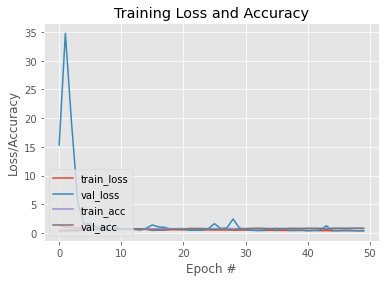

In [33]:
draw_evaluation(history_0)